# 1. Decision Tree Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

### 1.1 Data

In [2]:
data = {
    "value": [30, 120, 150, 390, 400, 300, 500],
    "label": [0, 0, 1, 0, 0, 1, 0]}

data = pd.DataFrame(data)
data

,value,label
0,30,0
1,120,0
2,150,1
3,390,0
4,400,0
5,300,1
6,500,0


# 2. Decision Tree

### 2.1 변수 값에 따라 데이터를 정렬

In [3]:
sorted_data = data.sort_values(by="value")
sorted_data

,value,label
0,30,0
1,120,0
2,150,1
5,300,1
3,390,0
4,400,0
6,500,0


In [4]:
sorted_data = sorted_data.reset_index(drop=True)
sorted_data

,value,label
0,30,0
1,120,0
2,150,1
3,300,1
4,390,0
5,400,0
6,500,0


### 2.2 정답이 바귀는 경계 지점 찾기

In [5]:
boundary = sorted_data["label"].diff() != 0
boundary

0     True
1    False
2     True
3    False
4     True
5    False
6    False
Name: label, dtype: bool

In [6]:
boundary[0] = False
boundary

0    False
1    False
2     True
3    False
4     True
5    False
6    False
Name: label, dtype: bool

In [7]:
boundary_idx = boundary.loc[boundary].index
boundary_idx

Int64Index([2, 4], dtype='int64')

### 2.3 경계 평균값 기준으로 설정

In [8]:
idx_1 = boundary_idx[0]
data.loc[[idx_1-1, idx_1]]

,value,label
1,120,0
2,150,1


In [9]:
bound_value_1 = data.loc[[idx_1-1, idx_1], "value"].mean()
bound_value_1

135.0

In [10]:
idx_2 = boundary_idx[1]
bound_value_2 = data.loc[[idx_2-1, idx_2], "value"].mean()

bound_value_2

395.0

### 2.4 구간별 경계깞 기준으로 정보이득 계산

In [11]:
def gini_index(label):
    p1 = (label == 0).mean()
    p2 = 1 - p1
    return 1 - (p1 ** 2 + p2 **2)

def concat_gini_index(left, right):
    left_gini = gini_index(left)
    right_gini = gini_index(right)
    all_num = len(left) + len(right)
    left_gini *= len(left) / all_num
    right_gini *= len(right) / all_num
    return left_gini + right_gini

In [12]:
# 135를 경계로 나눌때
left_1 = sorted_data.loc[:idx_1 - 1, "label"]
right_1 = sorted_data.loc[idx_1:, "label"]

left_1

0    0
1    0
Name: label, dtype: int64

In [13]:
gini_index(right_1)

0.48

In [14]:
concat_gini_index(left_1, right_1)

0.34285714285714286

In [15]:
# 345를 경계로 나눌 때
left_2 = sorted_data.loc[:idx_2 - 1, "label"]
right_2 = sorted_data.loc[idx_2:, "label"]

concat_gini_index(left_2, right_2)

0.2857142857142857

# 3. Decision Tree Package

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(max_depth=1)
tree.fit(data["value"].to_frame(), data["label"])

DecisionTreeClassifier(max_depth=1)

[Text(167.4, 163.07999999999998, 'X[0] <= 345.0\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(83.7, 54.360000000000014, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

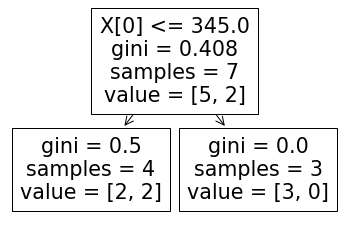

In [17]:
plot_tree(tree)